In [1]:
# 1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). 
# Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. 
# Use KNeighborsClassifier classifier and report the score on the test dataset.

In [5]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=431)

In [6]:
scaler = MinMaxScaler()
scaler.fit(np.concatenate([X_train, X_test], axis=0))
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating KNNC
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9758241758241758, 0.9649122807017544)

In [7]:
# 2) Repeat Step 1 using pipelines and report the score.

In [8]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

# Fitting the pipeline t
pipeline.fit(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]))
# Evalute pipeline on the test data
pipeline.score(X_test, y_test), pipeline.score(X_train, y_train)

(0.9912280701754386, 0.9758241758241758)

In [9]:
# 3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor.

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors':  np.arange(1, 120)} # :(
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'knn__n_neighbors': 4}, 0.9714285714285713)

In [11]:
# 4) Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

# Use `from sklearn.neighbors import KNeighborsRegressor'
# You need to split the data into X and y.
# Check the data shape
# Check the data types
# Print the column names of the data frame
# Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that)
# Create alist of features that are numeric and not numeric
# Create a pipeline of imputer and standard scaler for the numeric features
# Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
# You can create your column transformer in different ways
# Finally create a pipeline of column transformer and kNeighborsRegressor
# Split your data into train and test datasets
# Report the score on the test dataset

In [37]:
import pandas as pd 

df = pd.read_csv('bike_day_raw.csv')
df.sample(10)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
517,2,6,0,5,1,2,0.654167,0.607962,0.755417,0.237563,4127
398,1,2,0,5,1,1,0.313333,0.309346,0.526667,0.178496,4151
142,2,5,0,1,1,2,0.631667,0.590296,0.810000,0.233842,4274
490,2,5,0,6,0,2,0.621667,0.584608,0.756667,0.152992,6883
357,1,12,0,6,0,1,0.302500,0.299242,0.542500,0.190304,1011
583,3,8,0,1,1,2,0.752500,0.710246,0.654167,0.129354,7013
38,1,2,0,2,1,1,0.220833,0.198246,0.537917,0.361950,1530
396,1,2,0,3,1,1,0.469167,0.466538,0.507917,0.189067,4579
441,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,7836
429,1,3,0,1,1,1,0.243333,0.241171,0.506250,0.228858,3333


In [38]:
df.sample(10)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
51,1,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,1107
312,4,11,0,3,1,1,0.400000,0.409079,0.758333,0.062196,4109
280,4,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,5409
730,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,2729
75,1,3,0,4,1,1,0.415000,0.410333,0.602917,0.209579,2744
93,2,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,3115
494,2,5,0,3,1,2,0.575000,0.553025,0.744167,0.216412,4717
436,1,3,0,1,1,1,0.466667,0.459592,0.489167,0.207713,5298
504,2,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,8294
535,2,6,0,2,1,1,0.688333,0.654692,0.690000,0.148017,6825


In [39]:
df.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2274c7a2b30>,
 'caps': [<matplotlib.lines.Line2D at 0x2274c7a3070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2274c7a2890>,
 'medians': [<matplotlib.lines.Line2D at 0x2274c7a35b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2274c7a3850>,
 'means': []}

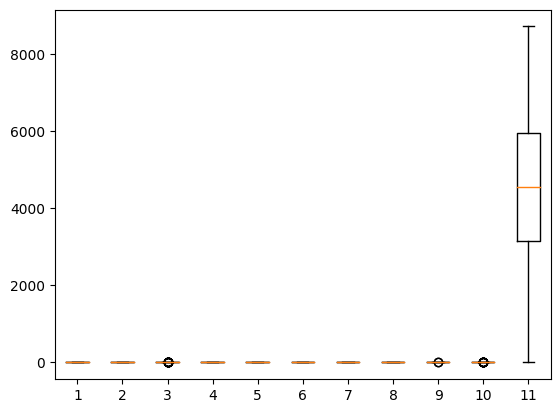

In [40]:
import matplotlib.pyplot as plt
plt.boxplot(df)

In [41]:
df.describe(include='all')

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [42]:
cat = df[df.columns[:6]]
num = df[df.columns[6:]]

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=431)

In [57]:
num = X_train.select_dtypes(include=['int64', 'float64']).columns
cat = X_train.select_dtypes(include=['object', 'category']).columns

In [62]:
num_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

cat_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore')
)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num),
        ('cat', cat_transformer, cat)
    ]
)

# Create the model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

In [63]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('knn', KNeighborsRegressor())])

In [64]:
model.score(X_train, y_train),model.score(X_test, y_test)

(0.7133918279280074, 0.47887333703972457)

In [65]:
param_grid = {'knn__n_neighbors': np.arange(1, 120)}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Sim...
             param_grid={'knn__n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119])})

In [66]:
grid_search.best_params_, grid_search.best_score_

({'knn__n_neighbors': 8}, 0.5469022708723562)